In [ ]:
# !cat /proc/cpuinfo
# !grep -c processor /proc/cpuinfo
# !free -h

In [29]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import pandas_profiling
%matplotlib notebook

In [ ]:
# dataset_raw = pd.read_csv('../data/raw_houses_dataset_2019-06-28 10:48:20.532824.csv')
uri = 'https://www.dropbox.com/s/19wize05bemz750/raw_houses_dataset_2019-06-28%2010%3A48%3A20.532824.csv'
!wget $uri -O dataset.csv
dataset_raw = pd.read_csv('dataset.csv')

In [81]:
dataset = pd.read_csv('../data/preprocessed/details_rent_house_dataset_2019-07-09.csv')

In [82]:
nunique = dataset.nunique()
dataset = dataset[nunique[nunique != 0].index]

In [83]:
dataset.drop_duplicates(inplace=True)
mask_type = dataset['tipo_propiedad'].isin(
    [
#         'Casas',
        'Apartamentos',
    ]
)
mask_office = ~dataset['oficina'].fillna(0).astype(bool)
dataset = dataset[mask_type & mask_office]
dataset = dataset.drop(columns=['tipo_propiedad', 'oficina'])


In [ ]:
dataset[['acepta_permuta', 'ambientes_extra',
         
         'ambientes',
        'ano_de_construccion', 'aptos_por_piso', 'banos',
       'banos_extra', 'cantidad_de_pisos', 'casco', 'description', 'direccion',
       'disposicion', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra',
       'estado', 'extra', 'financia', 'garajes', 'garajes_extra',
       'gastos_comunes', 'hectareas', 'kind', 'longitud_frente',
       'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados', 'penthouse',
       'piso', 'plantas', 'plantas_extra', 'price', 'referencia', 'sobre',
       'title', 'uri', 'vista_al_mar', 'vivienda_social', 'zona']]

In [124]:
dataset[dataset['ambientes'].isna()]

,acepta_permuta,agency,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,...,plantas,plantas_extra,price,referencia,sobre,title,uri,vista_al_mar,vivienda_social,zona
1,NaN,INMOBILIARIA GOLF,NaN,NaN,False,NaN,NaN,1.0,False,NaN,...,NaN,False,128000.0,3AB8A,NaN,Uruguay | Montevideo | Pocitos Nuevo | Unidad ...,https://www.infocasas.com.uy/uruguay-montevide...,NaN,NaN,Pocitos Nuevo
2,NaN,Mineiro Propiedades,NaN,NaN,False,1980.0,2.0,1.0,False,2.0,...,1.0,False,130000.0,44F3C,Otros,Venta Apartamento 2 Dormitorios La Blanqueada,https://www.infocasas.com.uy/venta-apartamento...,NaN,NaN,La Blanqueada
4,NaN,Dra. Elizabeth Hambrook,NaN,NaN,False,2016.0,2.0,3.0,True,7.0,...,1.0,False,358000.0,5007D,Otros,Venta Apartamento En Malvín Sur 3 Dorm 3 Baños...,https://www.infocasas.com.uy/venta-apartamento...,NaN,NaN,Malvín
14,NaN,LaCasa,NaN,NaN,False,1997.0,NaN,1.0,False,NaN,...,NaN,False,90000.0,91654,NaN,24 M2. Monoambiente En Excelente Ubicacion,https://www.infocasas.com.uy/24-m2-monoambient...,NaN,NaN,Punta Carretas
18,NaN,Equipo Propiedades,NaN,NaN,False,NaN,2.0,2.0,False,11.0,...,1.0,False,235000.0,CE316,Avenida,Mandalay-bajo De Precio-impecable Apartamento ...,https://www.infocasas.com.uy/mandalaybajo-de-p...,NaN,NaN,Pocitos
27,NaN,Equilibrio,NaN,NaN,False,2001.0,5.0,2.0,False,6.0,...,1.0,False,220000.0,4F997,Otros,Apartamento 3 Dormitorios Y 2 Baños ( Malvin ),https://www.infocasas.com.uy/apartamento-3-dor...,NaN,NaN,Malvín
29,NaN,Victoria Propiedades,NaN,NaN,False,2017.0,NaN,1.0,False,NaN,...,1.0,False,106500.0,B4ADA,NaN,Oportunidad Con Muy Buena Renta!!!!,https://www.infocasas.com.uy/oportunidad-con-m...,NaN,1.0,Brazo Oriental
30,NaN,FOTI Pocitos,NaN,NaN,False,1991.0,NaN,3.0,True,NaN,...,NaN,False,350000.0,96C81,NaN,Muy Buena Planta A Pasos Del Parque Villa Biar...,https://www.infocasas.com.uy/muy-buena-planta-...,NaN,NaN,Villa Biarritz
31,NaN,Pietrafesa,NaN,NaN,False,2013.0,NaN,1.0,False,NaN,...,1.0,False,106000.0,4F9C1,Avenida,Impecable Monoambiente En 21 De Setiembre Y Bv...,https://www.infocasas.com.uy/impecable-monoamb...,1.0,NaN,Parque Rodó
34,NaN,Arbol Propiedades,NaN,NaN,False,1960.0,3.0,1.0,False,2.0,...,1.0,False,140000.0,FB919,Otros,Facultad Ingenieria,https://www.infocasas.com.uy/facultad-ingenier...,NaN,NaN,Punta Carretas


In [121]:
columns_model = ['acepta_permuta', 'ano_de_construccion', 'aptos_por_piso', 'banos',
 'banos_extra', 'cantidad_de_pisos', 'disposicion', 'distancia_al_mar',
 'dormitorios', 'dormitorios_extra', 'estado', 'financia', 'garajes', 'garajes_extra',
 'gastos_comunes', 'longitud_frente', 'm2_de_la_terraza', 'm2_del_terreno',
 'm2_edificados', 'penthouse', 'piso', 'plantas', 'plantas_extra',
 'price', 'sobre', 'vista_al_mar', 'vivienda_social', 'zona', 'uri']
columns_strs = ['description', 'direccion', 'extra', 'referencia', 'title']

In [122]:
dataset[columns_model]

,acepta_permuta,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,disposicion,distancia_al_mar,dormitorios,dormitorios_extra,...,penthouse,piso,plantas,plantas_extra,price,sobre,vista_al_mar,vivienda_social,zona,uri
1,NaN,NaN,NaN,1.0,False,NaN,Contrafrente,NaN,0.0,False,...,NaN,NaN,NaN,False,128000.0,NaN,NaN,NaN,Pocitos Nuevo,https://www.infocasas.com.uy/uruguay-montevide...
2,NaN,1980.0,2.0,1.0,False,2.0,Al frente,NaN,2.0,False,...,NaN,1.0,1.0,False,130000.0,Otros,NaN,NaN,La Blanqueada,https://www.infocasas.com.uy/venta-apartamento...
4,NaN,2016.0,2.0,3.0,True,7.0,Al frente,100.0,3.0,False,...,NaN,1.0,1.0,False,358000.0,Otros,NaN,NaN,Malvín,https://www.infocasas.com.uy/venta-apartamento...
14,NaN,1997.0,NaN,1.0,False,NaN,Al frente,NaN,0.0,False,...,NaN,NaN,NaN,False,90000.0,NaN,NaN,NaN,Punta Carretas,https://www.infocasas.com.uy/24-m2-monoambient...
18,NaN,NaN,2.0,2.0,False,11.0,Al frente,300.0,2.0,False,...,NaN,10.0,1.0,False,235000.0,Avenida,NaN,NaN,Pocitos,https://www.infocasas.com.uy/mandalaybajo-de-p...
27,NaN,2001.0,5.0,2.0,False,6.0,Al frente,NaN,3.0,False,...,NaN,3.0,1.0,False,220000.0,Otros,NaN,NaN,Malvín,https://www.infocasas.com.uy/apartamento-3-dor...
29,NaN,2017.0,NaN,1.0,False,NaN,Contrafrente,NaN,1.0,False,...,NaN,6.0,1.0,False,106500.0,NaN,NaN,1.0,Brazo Oriental,https://www.infocasas.com.uy/oportunidad-con-m...
30,NaN,1991.0,NaN,3.0,True,NaN,Al frente,NaN,3.0,False,...,NaN,NaN,NaN,False,350000.0,NaN,NaN,NaN,Villa Biarritz,https://www.infocasas.com.uy/muy-buena-planta-...
31,NaN,2013.0,NaN,1.0,False,NaN,Contrafrente,500.0,0.0,False,...,NaN,3.0,1.0,False,106000.0,Avenida,1.0,NaN,Parque Rodó,https://www.infocasas.com.uy/impecable-monoamb...
34,NaN,1960.0,3.0,1.0,False,2.0,Interior,400.0,2.0,False,...,NaN,1.0,1.0,False,140000.0,Otros,NaN,NaN,Punta Carretas,https://www.infocasas.com.uy/facultad-ingenier...


,acepta_permuta,agency,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,...,plantas,plantas_extra,price,referencia,sobre,title,uri,vista_al_mar,vivienda_social,zona
1,NaN,INMOBILIARIA GOLF,NaN,NaN,False,NaN,NaN,1.0,False,NaN,...,NaN,False,128000.0,3AB8A,NaN,Uruguay | Montevideo | Pocitos Nuevo | Unidad ...,https://www.infocasas.com.uy/uruguay-montevide...,NaN,NaN,Pocitos Nuevo
2,NaN,Mineiro Propiedades,NaN,NaN,False,1980.0,2.0,1.0,False,2.0,...,1.0,False,130000.0,44F3C,Otros,Venta Apartamento 2 Dormitorios La Blanqueada,https://www.infocasas.com.uy/venta-apartamento...,NaN,NaN,La Blanqueada
4,NaN,Dra. Elizabeth Hambrook,NaN,NaN,False,2016.0,2.0,3.0,True,7.0,...,1.0,False,358000.0,5007D,Otros,Venta Apartamento En Malvín Sur 3 Dorm 3 Baños...,https://www.infocasas.com.uy/venta-apartamento...,NaN,NaN,Malvín
14,NaN,LaCasa,NaN,NaN,False,1997.0,NaN,1.0,False,NaN,...,NaN,False,90000.0,91654,NaN,24 M2. Monoambiente En Excelente Ubicacion,https://www.infocasas.com.uy/24-m2-monoambient...,NaN,NaN,Punta Carretas
18,NaN,Equipo Propiedades,NaN,NaN,False,NaN,2.0,2.0,False,11.0,...,1.0,False,235000.0,CE316,Avenida,Mandalay-bajo De Precio-impecable Apartamento ...,https://www.infocasas.com.uy/mandalaybajo-de-p...,NaN,NaN,Pocitos
27,NaN,Equilibrio,NaN,NaN,False,2001.0,5.0,2.0,False,6.0,...,1.0,False,220000.0,4F997,Otros,Apartamento 3 Dormitorios Y 2 Baños ( Malvin ),https://www.infocasas.com.uy/apartamento-3-dor...,NaN,NaN,Malvín
29,NaN,Victoria Propiedades,NaN,NaN,False,2017.0,NaN,1.0,False,NaN,...,1.0,False,106500.0,B4ADA,NaN,Oportunidad Con Muy Buena Renta!!!!,https://www.infocasas.com.uy/oportunidad-con-m...,NaN,1.0,Brazo Oriental
30,NaN,FOTI Pocitos,NaN,NaN,False,1991.0,NaN,3.0,True,NaN,...,NaN,False,350000.0,96C81,NaN,Muy Buena Planta A Pasos Del Parque Villa Biar...,https://www.infocasas.com.uy/muy-buena-planta-...,NaN,NaN,Villa Biarritz
31,NaN,Pietrafesa,NaN,NaN,False,2013.0,NaN,1.0,False,NaN,...,1.0,False,106000.0,4F9C1,Avenida,Impecable Monoambiente En 21 De Setiembre Y Bv...,https://www.infocasas.com.uy/impecable-monoamb...,1.0,NaN,Parque Rodó
34,NaN,Arbol Propiedades,NaN,NaN,False,1960.0,3.0,1.0,False,2.0,...,1.0,False,140000.0,FB919,Otros,Facultad Ingenieria,https://www.infocasas.com.uy/facultad-ingenier...,NaN,NaN,Punta Carretas


In [96]:
# dataset.hvplot.hist(y='m2_edificados', bins=range(0, 1000, 20), xlim=(0, 1000), groupby='zona') 

dataset.hvplot.hist(y='price', bins=range(0, 400000, 20000), xlim=(0, 400000), groupby='disposicion')

:DynamicMap   [disposicion]
   :Histogram   [price]   (price_count)

In [14]:
hover_col = [
    'rooms',
    'bathrooms',
    'area_m2',
    'price',
    'uris',
    'id',]

In [127]:
dataset.hvplot(x='m2_edificados', y='price', by='dormitorios',
               kind='scatter', xlim=(0, 500), ylim=(0, 1000000),
               groupby=['zona',],
#                hover_cols=hover_col,
              )

:DynamicMap   [zona]
   :NdOverlay   [dormitorios]
      :Scatter   [m2_edificados]   (price)

<IPython.core.display.Javascript object>


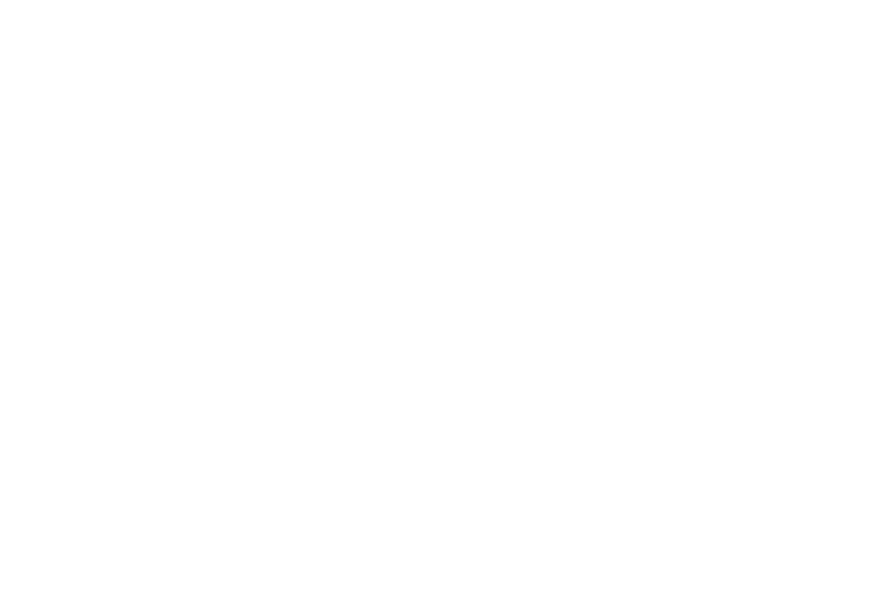

<IPython.core.display.Javascript object>


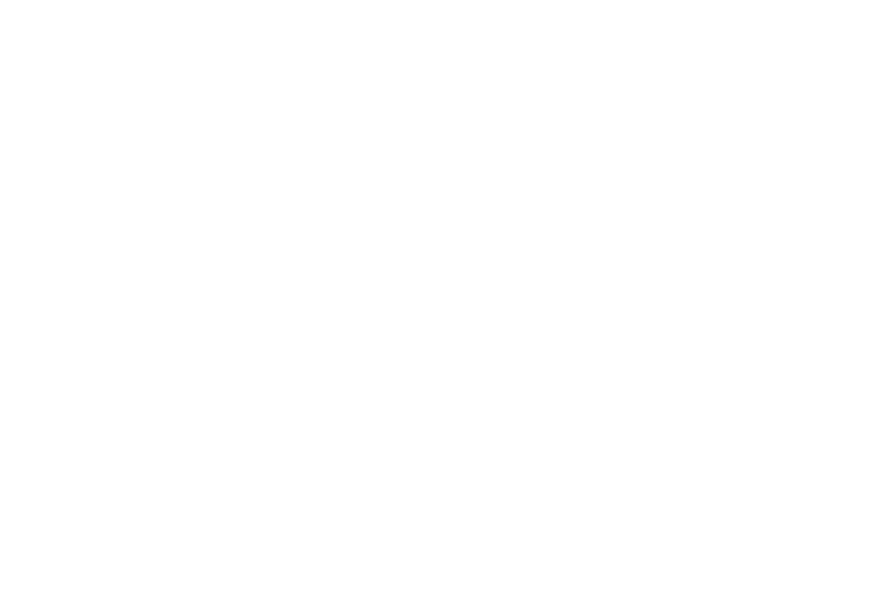

In [86]:
report = pandas_profiling.ProfileReport(dataset)
report.to_file('../report/dataset/report_apartments.html')